In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [2]:
import tensorflow as tf

/home/gx/anaconda3/envs/tf-1.14-gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/gx/anaconda3/envs/tf-1.14-gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/gx/anaconda3/envs/tf-1.14-gpu/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/gx/anaconda3/envs/tf-1.14-gpu/lib/pyt

In [3]:
tf.__version__

'1.14.0'

In [ ]:
!saved_model_cli show --dir="./saved_models/UGATIT_light_selfie2anime_lsgan_4resblock_6dis_1_1_10_10_1000_sn_smoothing/" \
    --tag_set serve \
    --signature_def serving_default

In [ ]:
predict = tf.contrib.predictor.from_saved_model("./saved_models/UGATIT_light_selfie2anime_lsgan_4resblock_6dis_1_1_10_10_1000_sn_smoothing/")

In [ ]:
predict

In [4]:
import glob

import numpy as np
import matplotlib.pyplot as plt

import cv2

In [5]:
def load_image(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

In [6]:
images = glob.glob("/mnt/9C5E1A4D5E1A2116/datasets/selfie2anime/testA/*.*")

In [7]:
len(images)

100

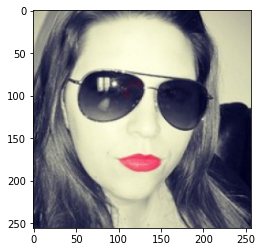

In [8]:
img = load_image(np.random.choice(images))
plt.imshow(img)

In [ ]:
# pred = predict({
#     "selfie": cv2.resize(img, (256, 256))[None, ...]
# })

In [10]:
config = tf.ConfigProto(allow_soft_placement=True)
config.gpu_options.allow_growth = True

In [11]:
# The given SavedModel SignatureDef contains the following input(s):
#   inputs['selfie'] tensor_info:
#       dtype: DT_FLOAT
#       shape: (1, 256, 256, 3)
#       name: test_domain_A:0
# The given SavedModel SignatureDef contains the following output(s):
#   outputs['anime'] tensor_info:
#       dtype: DT_FLOAT
#       shape: (1, 256, 256, 3)
#       name: generator_B/Tanh:0


with tf.Session(config=config) as sess:
    tf.saved_model.loader.load(
        sess,
        [tf.saved_model.tag_constants.SERVING],
        "./saved_models/UGATIT_light_selfie2anime_lsgan_4resblock_6dis_1_1_10_10_1000_sn_smoothing/"
    )

    prediction = sess.run(
        'generator_B/Tanh:0',
        feed_dict={
            'test_domain_A:0': cv2.resize(img, (256, 256))[None, ...]
        }
    )

    print(prediction)

INFO:tensorflow:Restoring parameters from ./saved_models/UGATIT_light_selfie2anime_lsgan_4resblock_6dis_1_1_10_10_1000_sn_smoothing/variables/variables
[[[[ 0.5863941   0.45579347  0.18547136]
   [ 0.60045767  0.47079977  0.2015265 ]
   [ 0.62476593  0.49661267  0.23200352]
   ...
   [ 0.42140645  0.33606184  0.09564487]
   [ 0.42156452  0.33551967  0.09547465]
   [ 0.42146096  0.33581442  0.09497277]]

  [[ 0.5812396   0.44977644  0.17580351]
   [ 0.5928619   0.4639796   0.19101672]
   [ 0.61750025  0.49002627  0.21870248]
   ...
   [ 0.42195526  0.33546588  0.09649241]
   [ 0.42210197  0.33491427  0.09629634]
   [ 0.42198077  0.33520052  0.09592292]]

  [[ 0.5700973   0.432356    0.15717585]
   [ 0.5802367   0.44458276  0.17035374]
   [ 0.6022682   0.47044992  0.20159046]
   ...
   [ 0.42197484  0.33624113  0.0954413 ]
   [ 0.42207512  0.33569977  0.09530831]
   [ 0.42193168  0.33593875  0.09490862]]

  ...

  [[-0.41695002 -0.5034683  -0.5711748 ]
   [-0.41442207 -0.5113358  -0.5655

In [12]:
prediction.shape

(1, 256, 256, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


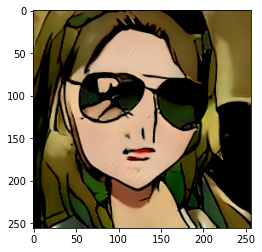

In [14]:
plt.imshow(np.squeeze(prediction))